# Metadata

```yaml
Course:  DS 5100
Module:  14 Python Modules 
Topic:   GGPlot in Python with Plotnine
Author:  R.C. Alvarado
Date:    09 July 2022
```

# GGPlot in Python

There are two ports of GGPlot2 to Python: `pygg` and `plotnine`.

The first seems to have stopped development and is much less used.

Let's look at Plotnine.

In [30]:
# ! conda install -c conda-forge plotnine -y

In [31]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype

In [32]:
from plotnine import *
from plotnine.data import mpg

Our old friend, `mpg` in Python:

In [33]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


# A Simple Bar Chart

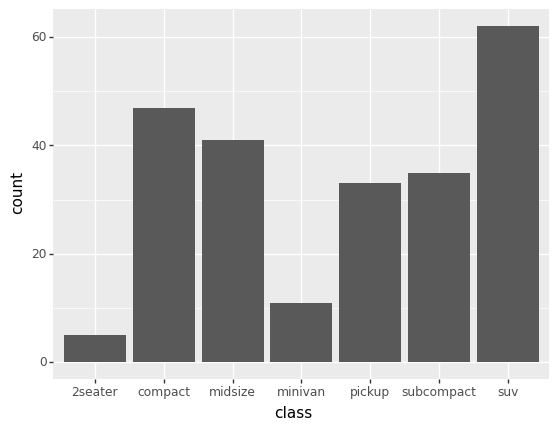

<ggplot: (8772511170545)>

In [34]:
(ggplot(mpg)            # defining what data to use
    + aes(x='class')    # defining what variable to use
    + geom_bar(size=20) # defining the type of plot to use
)

Notice that `aes()` is not a helper function (a function in the argument space).

Also, R dots become `_` in the argument names.

Note that we don't have to use the syntax above, which groups the functions in a single expression with `(...)`.

We can do this:

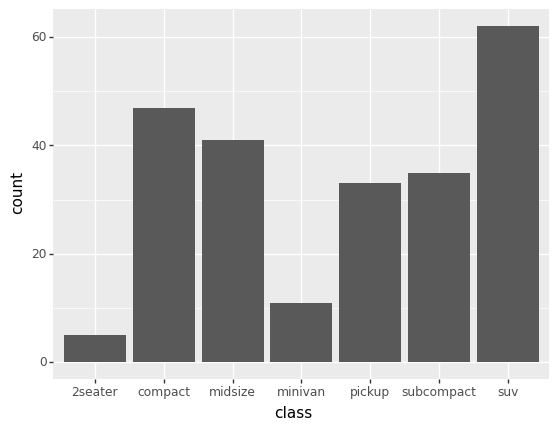

<ggplot: (8772511163386)>

In [35]:
ggplot(mpg) + aes(x='class') + geom_bar(size=20)

Or this:

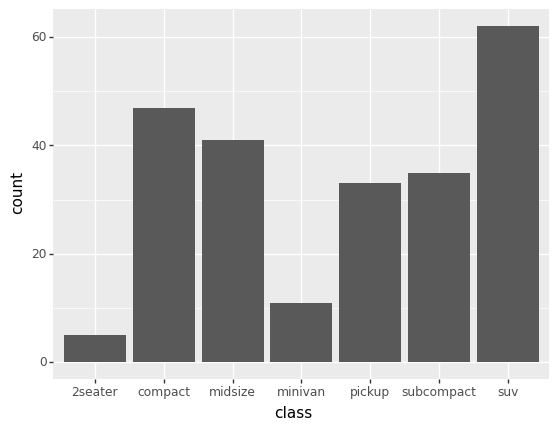

<ggplot: (8772511168516)>

In [36]:
ggplot(mpg) + \
    aes(x='class') + \
    geom_bar(size=20)

Note that none of these are like R due to differing white space rules.

# Faceting

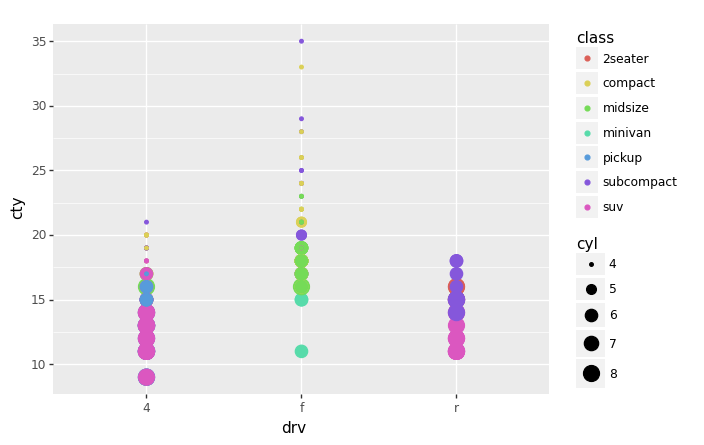

<ggplot: (8772510658823)>

In [37]:
ggplot(mpg) + \
    aes(x = 'drv', y = 'cty', color = 'class', size='cyl') + \
    geom_point()

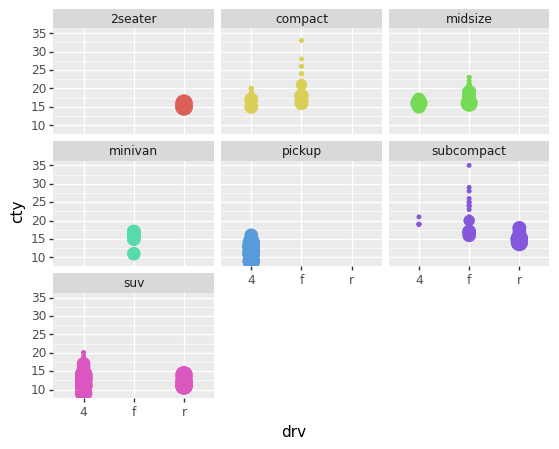

<ggplot: (8772512289440)>

In [38]:
(ggplot(mpg)         
 + aes(x='drv', y='cty', color='class', size='cyl')
 + geom_point()
 + facet_wrap('class')
 + theme(legend_position = "none")
)

# The Pandas Way

Note the GGPlot included the computation of counts in the `geom_bar()` function.

<AxesSubplot:>

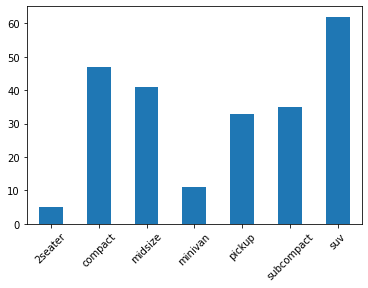

In [39]:
mpg['class'].value_counts().sort_index().plot.bar(rot=45)

However, sometomes Pandas *does* do internal calculations, as with `.hist()`:

<AxesSubplot:>

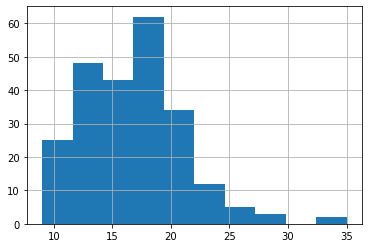

In [40]:
mpg['cty'].hist()

For **faceting in Pandas**, see this: https://stackoverflow.com/questions/29786227/how-do-i-plot-facet-plots-in-pandas

Notice that it is essentially the result of a `.groupby()` followed by `.unstack()`.

So, Pandas expects you to do the data transformations upfront.

GGPlot2 will handle these in the geometries and facets

GGPlot2 is easier, but Pandas separates comcerns

**As a rule, data operations should never take place in the visualization**.